# 1. Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
spotify =  pd.read_csv("files/spotify.csv")
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
list(spotify["track_genre"].unique())

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [4]:
len(spotify["artists"].unique())

31268

## 1.1 Data Description 

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.|
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.|
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.|
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

## 1.2 HANDLING MISSING VALUES

In [6]:
spotify.isnull().sum()[spotify.isnull().sum() != 0]

artists       1
album_name    1
track_name    1
dtype: int64

### Since the number of null values is negligible compared to the size of the dataset, we handle missing values by dropping the three rows that contains the null values.

In [7]:
spotify[["artists","album_name","track_name"]].dropna().reset_index(drop= True)

,artists,album_name,track_name
0,Gen Hoshino,Comedy,Comedy
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,Chord Overstreet,Hold On,Hold On
...,...,...,...
113021,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy
113022,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light
113023,Cesária Evora,Best Of,Miss Perfumado
113024,Michael W. Smith,Change Your World,Friends


## 1.3 HANDLING DUPLICATES

### During our inspection of the dataset, we found duplicate records (to be precise, we found 444 songs that were duplicated).

In [8]:
spotify[spotify.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1911,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346.0,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2141,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666.0,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3723,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621.0,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4599,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714.0,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5708,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080.0,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110288,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826.0,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
110403,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152.0,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111018,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773.0,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112002,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933.0,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


### Dropping duplicate records

In [9]:
spotify.drop_duplicates(inplace = True)
spotify[spotify.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [10]:
def order_delimited_text(text, delimiter):
    if isinstance(text, str):
        items = [item.strip() for item in text.split(delimiter)]
        items.sort()
        return delimiter.join(items)
    else:
        return text

spotify['artists'] = spotify['artists'].apply(lambda x: order_delimited_text(x, ';'))
spotify.drop_duplicates(inplace=True)
spotify.reset_index(drop=True, inplace=True)

print("Number of Duplicated Records:", spotify.duplicated().sum())


Number of Duplicated Records: 0


In [11]:
inconsistent_check = {}

for i in range(len(spotify)):
    if spotify["album_name"][i] in inconsistent_check:
        inconsistent_check[spotify["album_name"][i]] += 1
    else:
        inconsistent_check[spotify["album_name"][i]] = 1

In [12]:
inconsistency = [(key,value) for key, value in sorted(inconsistent_check.items(), key=lambda x: x[1], reverse=True) if value > 1]
inconsistency

[('Alternative Christmas 2022', 195),
 ('Feliz Cumpleaños con Perreo', 180),
 ('Metal', 143),
 ('Halloween con perreito', 122),
 ('Halloween Party 2022', 114),
 ('Fiesta portatil', 108),
 ('The Complete Hank Williams', 108),
 ('Frescura y Perreo', 106),
 ('Esto me suena a Farra', 105),
 ("On air 70's Hits", 101),
 ('Perreo en Halloween', 101),
 ('Queda poco para la PAES 2.0', 100),
 ('Reggeaton Imperdible', 97),
 ('Halloween Metal Nights', 95),
 ('Homecoming Latin Party', 95),
 ('Arbeitsmusik Herbst/Winter 2022/2023', 93),
 ('Greatest Hits', 92),
 ('El perreo es el futuro', 92),
 ('EDM Gaming Music Autumn/Winter 2022', 90),
 ('Christmas Songs 2022', 87),
 ('Reggaeton Mix Perreito', 85),
 ('Clásicos de ahora: Perreo', 84),
 ('Classical Christmas', 82),
 ("World's Best Christmas Playlist", 82),
 ('Best 70s Rock Tunes', 81),
 ('Night Drive Autumn/Winter 2022/23', 81),
 ('Perreo Tenebroso Vol. 2', 80),
 ('Rock & Halloween', 79),
 ("80's", 78),
 ('Perreo Tenebroso Vol. 5', 78),
 ('Christmas

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
def selectOneTrackFromDuplicated(data, attributes):
    max_point = data[attributes].max()
    cosine_similarities = cosine_similarity(data[attributes], [max_point])
    min_distance_idx = np.argmax(cosine_similarities)
    dropping_idx = data.index[data.index != min_distance_idx].tolist()
    return dropping_idx

In [14]:
def getDroppingIdx(data, attributes, base_attr):
    dropping_idx = []
    clusters = data.groupby(attributes).filter(lambda group: len(group) > 1)
    for _, cluster in clusters.groupby(attributes):
        dropping_idx.extend(selectOneTrackFromDuplicated(data=cluster, attributes=base_attr))

    return dropping_idx

In [15]:
dropping_idx = getDroppingIdx(data=spotify,
                                attributes=['track_name','artists', 'track_genre'],
                                base_attr=["popularity", "danceability", "energy", "tempo", "liveness","acousticness"])

spotify = spotify.drop(dropping_idx).reset_index(drop=True)
same_track = spotify[['track_name','artists', 'track_genre']].value_counts()
mask = spotify[['track_name','artists', 'track_genre']].value_counts() > 1
print('Duplicated Records by track_name, artists, track_genre:', same_track[mask].size)

Duplicated Records by track_name, artists, track_genre: 0


In [16]:
spotify.shape

(92547, 20)

In [17]:
attributes = ["track_name", "artists", "track_genre"]
duplicates = spotify.duplicated(subset = attributes, keep = False)
duplicates.sum()

0

# 2. Exploratory Data Analysis

## 2.1 Spearman's correlation matrix


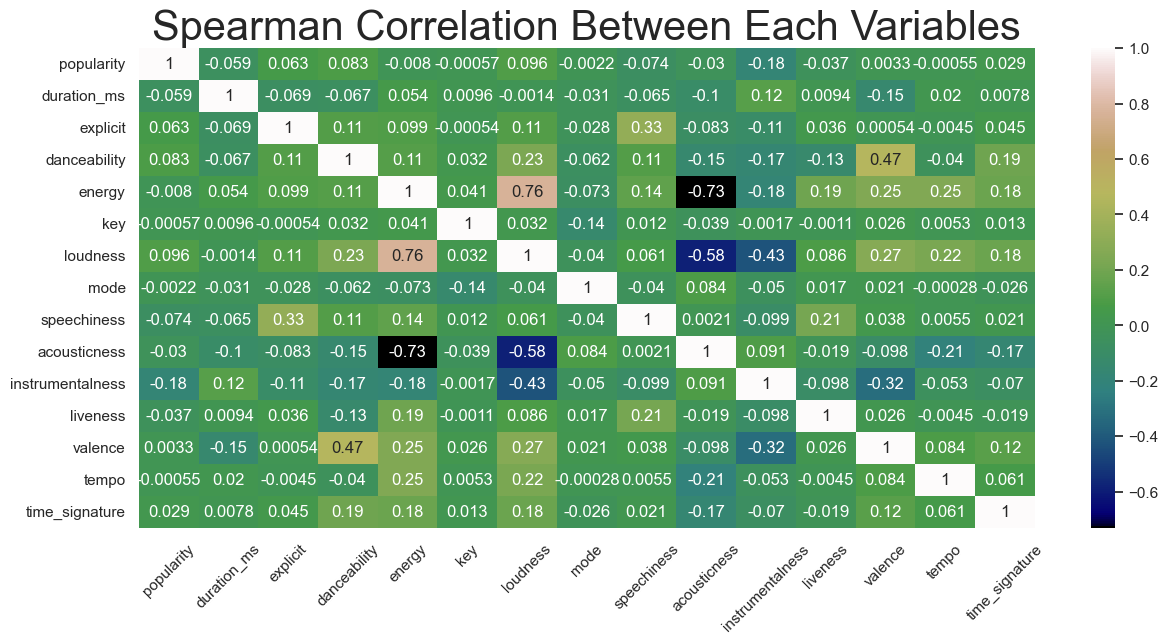

In [18]:
attr = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

sns.set_theme()

x = spotify[attr].corr()
fig = plt.figure(figsize =(14, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(x, cmap='gist_earth', annot=True, ax=ax)
plt.xticks(rotation = 45)
plt.title('Spearman Correlation Between Each Variables', fontsize = 30)
plt.show()

**Notable Observations**


1.   High positive correlation between loudness and energy (0.76).
2.   Similarly high negative correlation between energy and acousticness (-0.76).
3.   Significant correlation between danceability and valence (0.47).
4.   Some other notable correlations - (energy, valence), (explicit, speechiness), (tempo, energy)


## 2.2 Kendall's Tau for Association

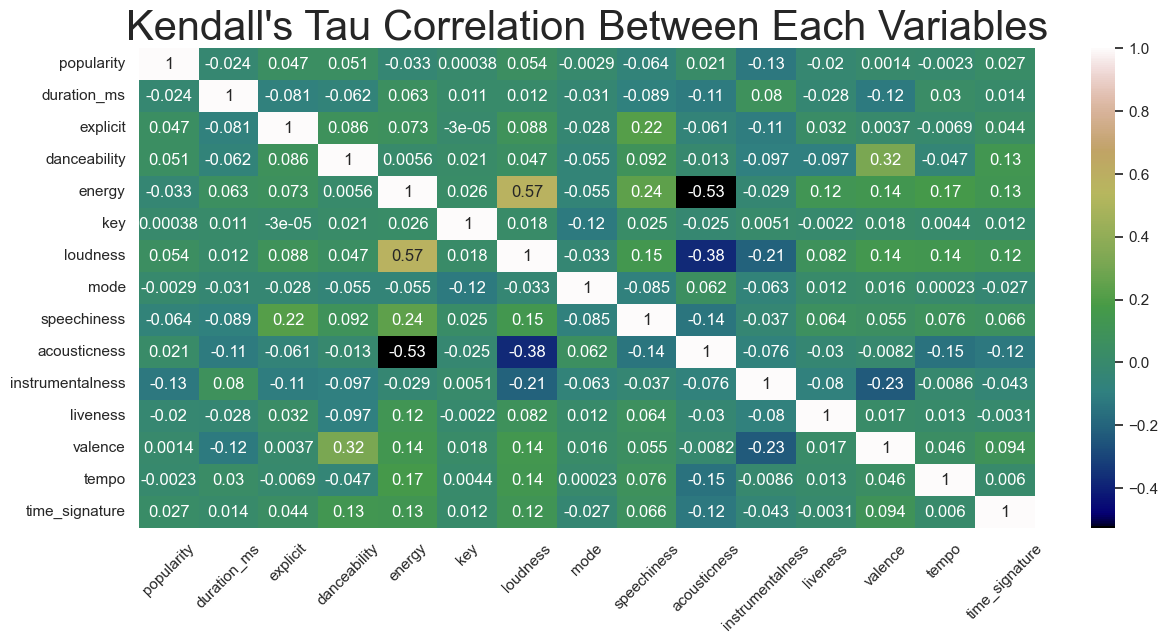

In [19]:
attr = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

sns.set_theme()

correlation_matrix_kendall = spotify[attr].corr(method='kendall')
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.heatmap(correlation_matrix_kendall, cmap='gist_earth', annot=True, ax=ax)
plt.xticks(rotation=45)
plt.title('Kendall\'s Tau Correlation Between Each Variables', fontsize=30)
plt.show()

**Notable Observations**

1.   High positive correlation between loudness and energy (0.57).
2.   Similarly high negative correlation between energy and acousticness (-0.53).
3.   Significant correlation between danceability and valence (0.32).





## 2.3 Analysing danceability across various attributes<br>

To analyse the importance of various musical attributes in contributing to the danceability several boxplots are plotted between danceability and energy, loudness, speechiness, acousticness, tempo, valence, popularity, liveness.



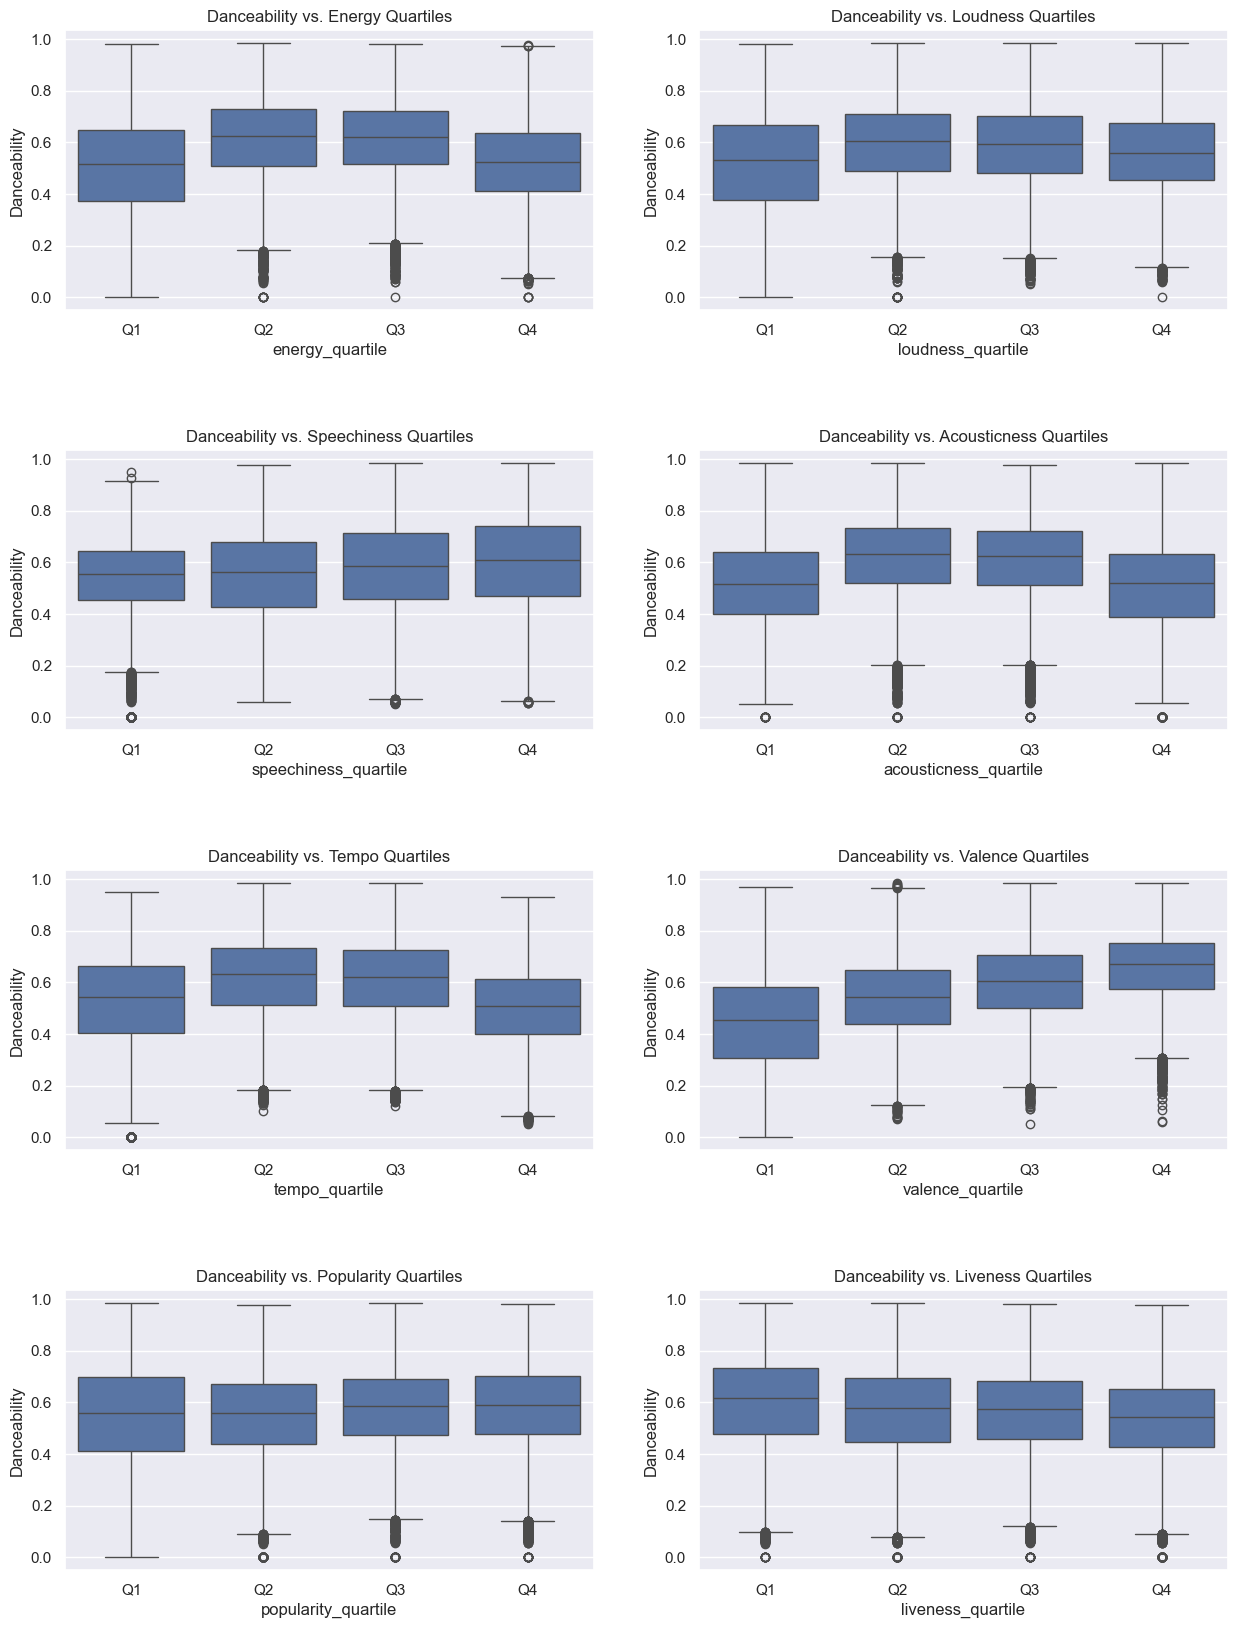

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

spotify_copy = spotify.copy()

attributes_to_analyze = ['energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'valence', 'popularity', 'liveness']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, attribute in enumerate(attributes_to_analyze):
    spotify_copy[f'{attribute}_quartile'] = pd.qcut(spotify_copy[attribute], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    sns.boxplot(data=spotify_copy, x=f'{attribute}_quartile', y='danceability', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Danceability vs. {attribute.capitalize()} Quartiles')
    axes[i // 2, i % 2].set_ylabel('Danceability')

plt.subplots_adjust(hspace=0.5)

plt.show()


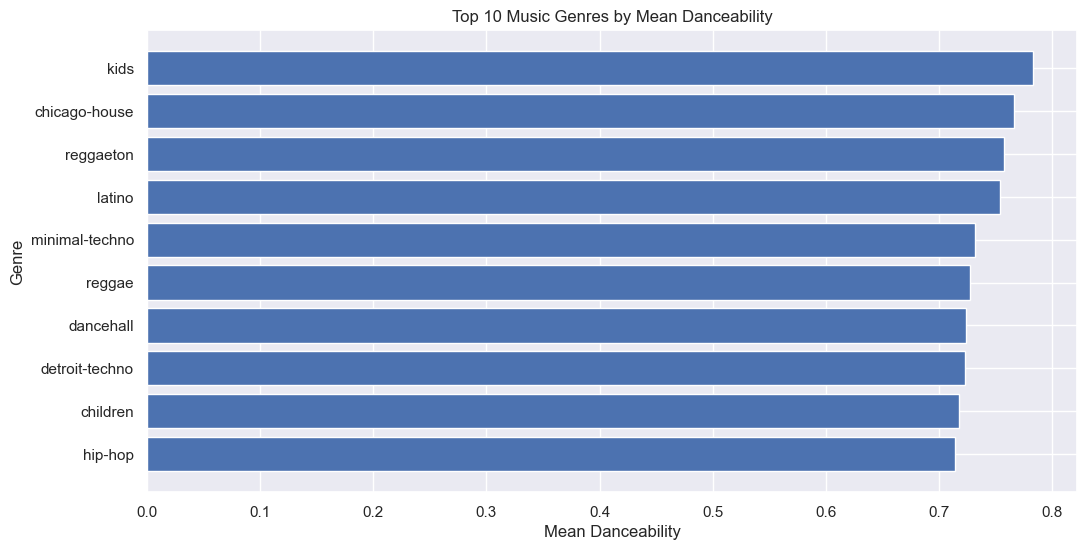

In [21]:
genre_danceability = spotify.groupby('track_genre')['danceability'].mean().reset_index()
genre_danceability = genre_danceability.sort_values(by='danceability', ascending=False)
top_n = 10  
plt.figure(figsize=(12, 6))
plt.barh(genre_danceability['track_genre'][:top_n], genre_danceability['danceability'][:top_n])
plt.xlabel('Mean Danceability')
plt.ylabel('Genre')
plt.title(f'Top {top_n} Music Genres by Mean Danceability')
plt.gca().invert_yaxis()  
plt.show()

# 3 Clustering track genres

Doc2vec is used to embed the track genres based on their definitions collected from the internet(dictionary.csv). It is useful for clubbing similar genres together which makes analysis and modelling easier. 

In [22]:
spotify.groupby('track_genre')['danceability'].agg(['mean', 'median', ('mode',lambda x: x.mode().iloc[0])])

,mean,median,mode
track_genre,,,
acoustic,0.550631,0.5555,0.582
afrobeat,0.667899,0.6860,0.677
alt-rock,0.539788,0.5490,0.557
alternative,0.564491,0.5580,0.487
ambient,0.370411,0.3700,0.324
...,...,...,...
techno,0.685802,0.7040,0.800
trance,0.572286,0.5790,0.518
trip-hop,0.638908,0.6510,0.641


In [23]:
dictionary =  pd.read_csv("files/GenreDictionary.csv")
dictionary = list(zip(dictionary['track_genre'], dictionary['definition']))
genre_dictionary = pd.read_csv("files/GenreDictionary.csv")

In [24]:
genre_dictionary

,track_genre,definition
0,Acoustic,Music produced primarily using acoustic instru...
1,Afrobeat,A genre of music that blends African rhythms w...
2,Alt-Rock,"Alternative rock, often abbreviated as alt-roc..."
3,Alternative,Alternative music is a broad category of music...
4,Ambient,Ambient music is a genre of music that is ofte...
...,...,...
109,Techno,Electronic dance music style with repetitive b...
110,Trance,Electronic music genre known for its hypnotic ...
111,Trip-Hop,Electronic music genre with downtempo beats an...
112,Turkish,"Music originating from Turkey, reflecting cult..."


In [26]:
import spacy
spacy.cli.download("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 5.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [27]:
import spacy
import numpy as np

nlp_model = spacy.load("en_core_web_md")

def lemmatizer(text):
    lower_case = text.lower()
    tokens = [token.lemma_ for token in nlp_model(lower_case) if not token.is_stop]
    sentence = " ".join(tokens)
    return sentence

def doc2vec(text):
    text = lemmatizer(text)
    vector = np.zeros(len(nlp_model('').vector))
    tokens = nlp_model(text)
    len_of_text = len(tokens)

    if len_of_text > 0:
        for token in tokens:            
            vector = vector + token.vector
        vector = vector / len_of_text
    return vector

def map_genre_to_doc2vec(df):
    definitions = list(df['definition'])
    num_samples, vec_dim = len(definitions), len(nlp_model('').vector)
    doc2vec_genre = np.zeros(num_samples * vec_dim).reshape(num_samples, vec_dim)

    for i, text in enumerate(definitions):
        vector = doc2vec(text)
        doc2vec_genre[i] = vector
    return doc2vec_genre


In [28]:
genre_vector = map_genre_to_doc2vec(genre_dictionary)
num_genres = min(len(genre_vector), 4)

for i in range(num_genres):
    print(f"doc2vec representation of genre #{i+1}: {genre_vector[i][0:5]}")
print(f"Shape of genre_vector: {genre_vector.shape}")


doc2vec representation of genre #1: [-2.11305028 -1.14766077 -0.45127899 -0.70645724  2.5030797 ]
doc2vec representation of genre #2: [-0.73599608 -0.67300832 -0.26579846 -0.42517961  2.73271044]
doc2vec representation of genre #3: [-1.64957852 -0.21205259  0.42846886 -0.28230861  3.03902001]
doc2vec representation of genre #4: [-1.95892875 -0.53798494 -0.58205962 -0.26466237  3.11721711]
Shape of genre_vector: (114, 300)


The genre embeddings have been saved in the "genre_embeddings.pth" file.

In [29]:
import torch
file_path = 'Sidhaarth-211AI035-GenreEmbedding.pth'
torch.save(genre_vector, file_path)

AgglomerativeClustering from sklearn is used for clustering the genre embeddings based on the Silhouette score.
The Silhouette Score is a metric that measures the quality of clustering by evaluating how similar data points are to their assigned clusters, with higher values indicating better clustering.

Optimal Number of Clusters: 27 (Highest Silhouette Score: 0.11502418326401082)


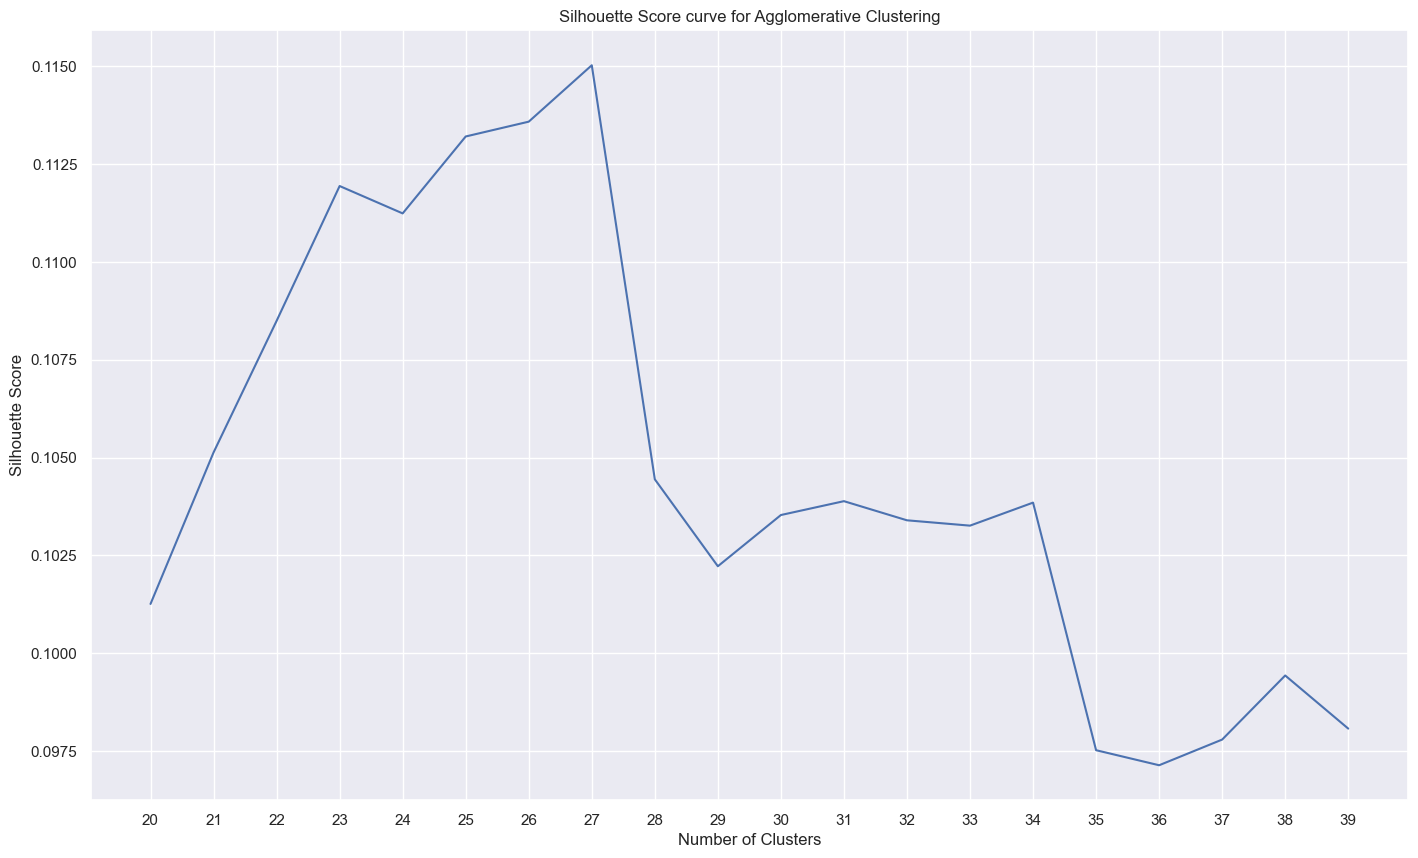

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = []
iteration = range(20, 40)
clusters.extend(iteration)

optimal_num_clusters = None
max_silhouette_score = -1

for k in iteration:
    model = AgglomerativeClustering(
        n_clusters=k,            
        affinity='euclidean',     
        linkage='ward'          
    )
    cluster_labels = model.fit_predict(genre_vector)
    silhouette_avg = silhouette_score(genre_vector, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters = k

sns.set(style='darkgrid')
fig = plt.figure(figsize=(17, 10))
plt.plot(clusters, silhouette_scores)
plt.grid(True)
plt.xticks(np.arange(min(clusters), max(clusters) + 1, 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score curve for Agglomerative Clustering')

print(f"Optimal Number of Clusters: {optimal_num_clusters} (Highest Silhouette Score: {max_silhouette_score})")


The clusters provide a better understanding of the genres and how they are related to each other. The clusters help in analysing the data better and make sure that the playlist is diverse for all people to enjoy.

In [31]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(
    n_clusters=27,            
    affinity='euclidean',   
    linkage='ward'          
)

genre_labels = agg_model.fit_predict(genre_vector)
genre_dictionary['cluster'] = genre_labels

genre_dictionary = genre_dictionary[['track_genre', 'cluster', 'definition']]
genre_dictionary


,track_genre,cluster,definition
0,Acoustic,2,Music produced primarily using acoustic instru...
1,Afrobeat,5,A genre of music that blends African rhythms w...
2,Alt-Rock,23,"Alternative rock, often abbreviated as alt-roc..."
3,Alternative,1,Alternative music is a broad category of music...
4,Ambient,14,Ambient music is a genre of music that is ofte...
...,...,...,...
109,Techno,20,Electronic dance music style with repetitive b...
110,Trance,2,Electronic music genre known for its hypnotic ...
111,Trip-Hop,5,Electronic music genre with downtempo beats an...
112,Turkish,11,"Music originating from Turkey, reflecting cult..."


In [32]:
result_dict = genre_dictionary.groupby('cluster')['track_genre'].apply(list).to_dict()
genre_cluster = pd.DataFrame(result_dict.items(), columns=['Cluster', 'Genres'])
genre_cluster

,Cluster,Genres
0,0,"[Disney, Happy, Pop, Sad, Show-Tunes]"
1,1,"[Alternative, Anime, British, Classical, Indie..."
2,2,"[Acoustic, Detroit-Techno, Dub, Electro, Elect..."
3,3,"[Hard-Rock, J-Rock, Psych-Rock]"
4,4,"[Breakbeat, Minimal-Techno]"
5,5,"[Afrobeat, Deep-House, Dubstep, Groove, Ska, S..."
6,6,"[Garage, Rock-n-Roll]"
7,7,"[Comedy, Dancehall, EDM, Singer-Songwriter, So..."
8,8,"[Brazil, Forro, Hardstyle, J-Idol, Jazz, Mando..."
9,9,"[Indie, Party, Pop-Film, Power-Pop, Synth-Pop]"


In [39]:

genre_dictionary['track_genre'] = genre_dictionary['track_genre'].apply(str.lower)
mapping_dict = genre_dictionary.groupby('track_genre')['cluster'].apply(int).to_dict()
spotify['track_genre_cluster'] = spotify['track_genre'].map(lambda x: mapping_dict[x])
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.166,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.359,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2
3,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594.0,False,0.442,0.632,1,...,1,0.0295,0.4260,0.004190,0.0735,0.196,78.899,4,acoustic,2
4,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712.0,False,0.489,0.314,7,...,0,0.0331,0.7490,0.000000,0.1130,0.607,124.234,4,acoustic,2


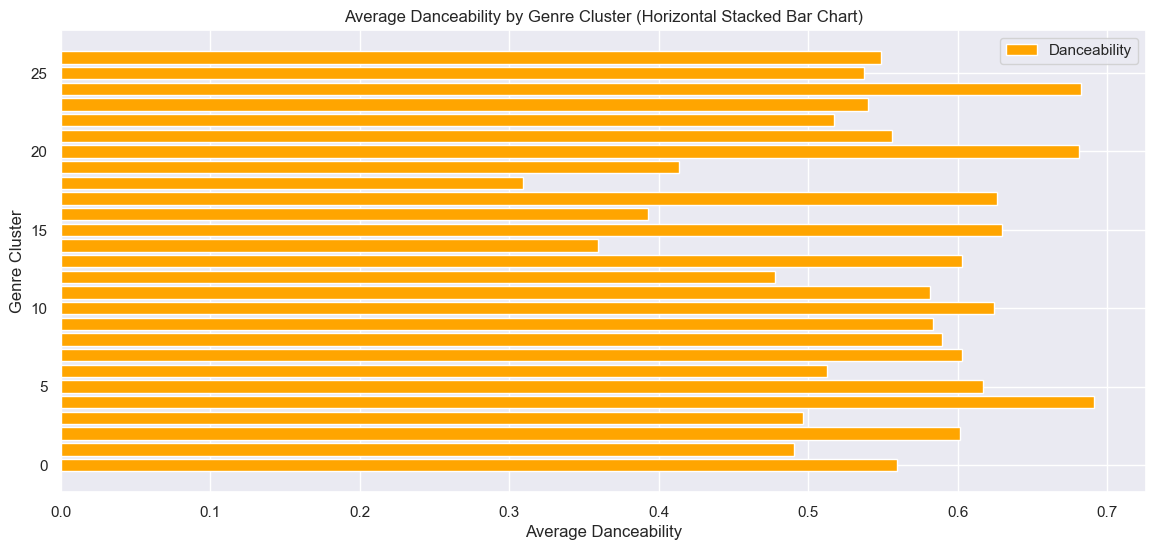

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
order = spotify.groupby('track_genre_cluster')['danceability'].mean().sort_values().index

avg_danceability = spotify.groupby('track_genre_cluster')['danceability'].mean()
cluster_labels = avg_danceability.index

plt.barh(cluster_labels, avg_danceability, color='orange', label='Danceability')

plt.xlabel('Average Danceability')
plt.ylabel('Genre Cluster')
plt.title('Average Danceability by Genre Cluster (Horizontal Stacked Bar Chart)')
plt.legend()
plt.show()


The above graph depicts average danceability across the genre clusters

In [35]:
import pandas as pd

avg_danceability = spotify.groupby('track_genre_cluster')['danceability'].mean()

cluster_summary = pd.DataFrame({'Average Danceability': avg_danceability})

cluster_summary['Genres'] = ''
for cluster in cluster_summary.index:
    genres_in_cluster = spotify[spotify['track_genre_cluster'] == cluster]['track_genre'].unique()
    cluster_summary.at[cluster, 'Genres'] = ', '.join(genres_in_cluster)

cluster_summary = cluster_summary.sort_values(by='Average Danceability', ascending=False)
display(cluster_summary)


,Average Danceability,Genres
track_genre_cluster,,
4,0.691050,"breakbeat, minimal-techno"
24,0.682019,"hip-hop, r-n-b, reggaeton"
20,0.681116,"blues, chicago-house, disco, house, techno"
15,0.629599,"j-dance, j-pop, k-pop"
17,0.626285,"club, dance"
10,0.624305,"children, country, folk, gospel, kids"
5,0.616606,"afrobeat, deep-house, dubstep, groove, ska, so..."
13,0.602538,"funk, honky-tonk, rock, rockabilly"
7,0.602460,"comedy, dancehall, edm, singer-songwriter, son..."


The above table represents the average danceability in descending order.
1. Cluster 4 has the highest average danceability of 0.69.
2. Cluster 24 and 20 come close to cluster 4 as well with average danceability of 0.68.
3. Cluster 18 has the least average danceability of 0.30

In [45]:
genre_priorities = [4, 24, 20, 15, 17, 10, 5, 13, 7, 2, 8, 9, 11, 0, 21, 26, 23, 25, 22, 6, 3, 1, 12, 19, 16, 14, 18]
len(genre_priorities)

27

In [52]:
import pandas as pd

sorted_dfs = []
for cluster in genre_priorities:
    cluster_df = spotify[spotify['track_genre_cluster'] == cluster]
    sorted_df = cluster_df.sort_values(by='danceability', ascending=False).head(4)
    sorted_dfs.append(sorted_df)

selected_tracks = pd.concat(sorted_dfs)

selected_tracks['track_genre_cluster'] = selected_tracks['track_genre_cluster'].astype(int)
selected_tracks = selected_tracks.set_index('track_genre_cluster').loc[genre_priorities].reset_index()

top_50_tracks = selected_tracks.head(50)[['track_name', 'danceability', 'track_genre_cluster']]

top_50_tracks.index += 1

print(top_50_tracks)


                                           track_name  danceability  \
1                                      Daily Routines         0.982   
2                                              Junoka         0.971   
3                               Poor People Must Work         0.961   
4        An Evidence Of Time - Claude VonStroke Remix         0.961   
5                                           Pineapple         0.964   
6                                         Best Friend         0.959   
7                                          NO MIENTEN         0.957   
8                                    WALK IN THE PARK         0.956   
9                                             Bitches         0.981   
10                                  Plastik Fantastik         0.980   
11                    The Underground - Hatiras Remix         0.979   
12                                        Most Wanted         0.976   
13                                Betray Di Gaza Boss         0.975   
14    

# 4. MODELLING

In [38]:
spotify.shape

(92547, 21)

In [39]:
spotify.drop(columns= ['track_id', 'artists', 'album_name', 'track_name','danceability'])

,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_cluster
0,73,230666.0,False,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,2
1,55,149610.0,False,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2
2,57,210826.0,False,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2
3,56,205594.0,False,0.632,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,2
4,52,198712.0,False,0.314,7,-9.245,0,0.0331,0.7490,0.000000,0.1130,0.6070,124.234,4,acoustic,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92542,21,384999.0,False,0.235,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,19
92543,22,385000.0,False,0.117,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,19
92544,22,271466.0,False,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,19
92545,41,283893.0,False,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,19


In [40]:
X = spotify.drop(columns= ['track_id', 'artists', 'album_name', 'track_name','danceability', 'track_genre'])
y = spotify.danceability

In [41]:
X = pd.DataFrame(X)
X.columns

Index(['popularity', 'duration_ms', 'explicit', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre_cluster'],
      dtype='object')

In [42]:
column_means = np.mean(X, axis=0)
column_variances = np.var(X, axis=0)
mean_list = []
var_list = []
for i, mean in enumerate(column_means):
    mean_list.append(mean)
for i, var in enumerate(column_variances):
    var_list.append(var)

In [43]:
var_list

[396.244239871765,
 12734158518.315853,
 0.0770163801251282,
 0.06483784457539407,
 12.646383574458293,
 26.26860119715149,
 0.23277427068143886,
 0.012164690101788332,
 0.1121076532850726,
 0.1046948417008579,
 0.038926248234284234,
 0.06752104977096093,
 898.6653046193176,
 0.11906103740236142,
 46.6282504158748]

In [44]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape, X_test.shape

((74037, 15), (18510, 15))

In [46]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

74037 74037
18510 18510


In [47]:
def evaluate_model(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)

    y_train_pred = estimator.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)


    y_test_pred = estimator.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print (f'R-squared train set: {r2_train:.4f}')
    print(f'R-squared test set: {r2_test:.4f}')
    print(f'MSE train set: {mse_train:.4f}')
    print( f'MSE test set: {mse_test:.4f}')
    print (f'MAE train set: {mae_train:.4f}')
    print(f'MAE test set: {mae_test:.4f}')

## ElasticNet

In [48]:
en_cv = ElasticNetCV(l1_ratio=np.arange(0, 1.1, 0.1), alphas = np.arange(0, 1.1, 0.1), random_state=42)
en_cv.fit(X, y)

best_alpha = en_cv.alpha_
print('Best alpha:', best_alpha)

best_l1_ratio= en_cv.l1_ratio_
print('Best l1_ratio:', best_l1_ratio)


en = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state = 42)
evaluate_model(en, X_train, y_train, X_test, y_test)

/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918.1070055498176, tolerance: 0.22018797355217368
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regul

Best alpha: 0.0
Best l1_ratio: 0.8
R-squared train set: 0.3412
R-squared test set: 0.3414
MSE train set: 0.0200
MSE test set: 0.0199
MAE train set: 0.1131
MAE test set: 0.1127


/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.400e+02, tolerance: 2.246e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


## SVM

In [49]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_test, y_test)

R-squared train set: 0.6648
R-squared test set: 0.6128
MSE train set: 0.0102
MSE test set: 0.0117
MAE train set: 0.0805
MAE test set: 0.0854


## XgBOOST

In [50]:
X_train.shape

(74037, 15)

In [51]:
xgbr = XGBRegressor(objective='reg:squarederror', random_state = 42)
evaluate_model(xgbr, X_train, y_train, X_test, y_test)

R-squared train set: 0.7539
R-squared test set: 0.6754
MSE train set: 0.0075
MSE test set: 0.0098
MAE train set: 0.0675
MAE test set: 0.0774


## Best model performance analysis

/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.920e+02, tolerance: 1.788e-01 Linear regression models with null weight for 

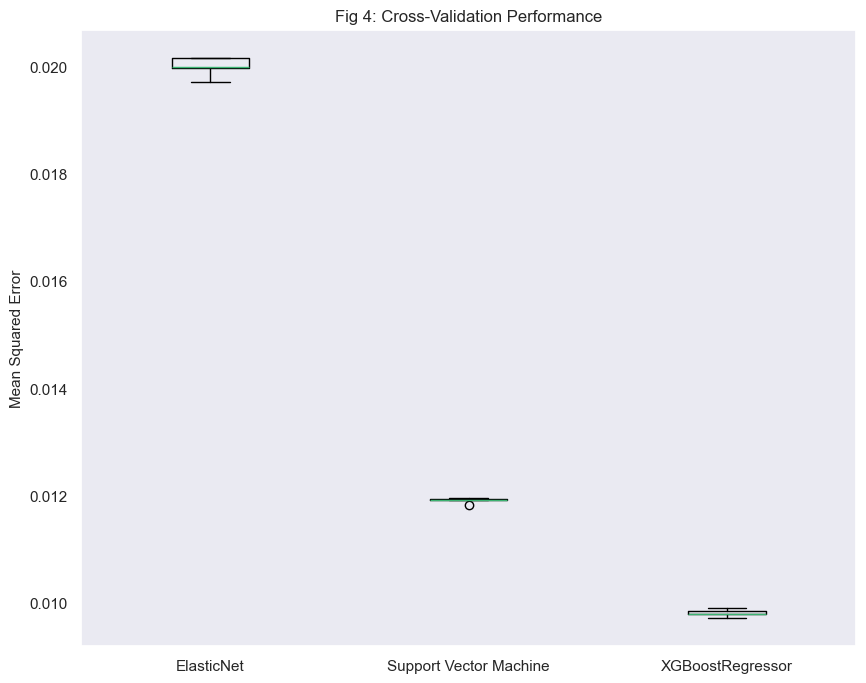

/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pranavkapparad/.local/share/virtualenvs/pranavkapparad-R5Mihogj/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.400e+02, tolerance: 2.246e-01 Linear regression models with null weight for 

ElasticNet
MSE Test Set: 0.0199

Support Vector Machine
MSE Test Set: 0.0117

XGBoostRegressor
MSE Test Set: 0.0098



In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

def cross_val_reg_boxplot(models_dict, X_train, y_train, X_test, y_test):
    results = []

    for name, model in models_dict.items():
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        results.append(cv_results)

    sns.set_style('dark')
    fig = plt.figure(figsize=(10, 8))
    plt.boxplot(results, labels=models_dict.keys(), medianprops={'color': 'mediumseagreen'})
    plt.ylabel('Mean Squared Error', fontsize=11)
    plt.title('Fig 4: Cross-Validation Performance')
    plt.show()

    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        print(f"{name}\nMSE Test Set: {mse_test:.4f}\n")

models_dict = {
    'ElasticNet': en,
    'Support Vector Machine': svr,
    'XGBoostRegressor': xgbr
}

cross_val_reg_boxplot(models_dict, X_train, y_train, X_test, y_test)

In [53]:
param_dist = {
    'n_estimators': [100, 400, 800, 1200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10]
}

xgbr = XGBRegressor(objective='reg:squarederror', random_state=42)  

random_search = RandomizedSearchCV(
    xgbr,
    param_distributions=param_dist,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params_xgb = random_search.best_params_
print(f"Best Parameters: {best_params_xgb}")

best_model_xgb = random_search.best_estimator_
evaluate_model(best_model_xgb, X_train, y_train, X_test, y_test)

Best Parameters: {'reg_lambda': 0, 'reg_alpha': 10, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0}
R-squared train set: 0.7001
R-squared test set: 0.6661
MSE train set: 0.0091
MSE test set: 0.0101
MAE train set: 0.0749
MAE test set: 0.0789


In [54]:
import pickle
with open('models/Savedmodel.pkl', 'wb') as model_file:
    pickle.dump(best_model_xgb, model_file)

In [55]:
with open('models/Savedmodel.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [56]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [57]:
loaded_model.predict([X_train[1]])

array([0.5078266], dtype=float32)